In [61]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [62]:
import numpy as np
import pandas as pd

In [63]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [64]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [65]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [66]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [67]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [68]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [69]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [70]:
# Inspect the DB
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [71]:
# Inspect Measurement table columns
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [72]:
# Inspect Station table columns
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [73]:
# Inspect Measurement table rows
mrms = session.query(Measurement).limit(10).all()
for mrm in mrms:
    print("Station: {0}, Date: {1}, Percipitation: {2}, Tobs: {3}".format(mrm.station, mrm.date, mrm.prcp, mrm.tobs))

Station: USC00519397, Date: 2010-01-01, Percipitation: 0.08, Tobs: 65.0
Station: USC00519397, Date: 2010-01-02, Percipitation: 0.0, Tobs: 63.0
Station: USC00519397, Date: 2010-01-03, Percipitation: 0.0, Tobs: 74.0
Station: USC00519397, Date: 2010-01-04, Percipitation: 0.0, Tobs: 76.0
Station: USC00519397, Date: 2010-01-06, Percipitation: None, Tobs: 73.0
Station: USC00519397, Date: 2010-01-07, Percipitation: 0.06, Tobs: 70.0
Station: USC00519397, Date: 2010-01-08, Percipitation: 0.0, Tobs: 64.0
Station: USC00519397, Date: 2010-01-09, Percipitation: 0.0, Tobs: 68.0
Station: USC00519397, Date: 2010-01-10, Percipitation: 0.0, Tobs: 73.0
Station: USC00519397, Date: 2010-01-11, Percipitation: 0.01, Tobs: 64.0


In [74]:
# Inspect Station table rows
stts = session.query(Station).limit(10).all()
for stt in stts:
    print("Station: {0}, Name: {1}, Lat: {2}, Lon: {3}, Elevation: {4}".\
          format(stt.station, stt.name, stt.latitude, stt.longitude, stt.elevation))

Station: USC00519397, Name: WAIKIKI 717.2, HI US, Lat: 21.2716, Lon: -157.8168, Elevation: 3.0
Station: USC00513117, Name: KANEOHE 838.1, HI US, Lat: 21.4234, Lon: -157.8015, Elevation: 14.6
Station: USC00514830, Name: KUALOA RANCH HEADQUARTERS 886.9, HI US, Lat: 21.5213, Lon: -157.8374, Elevation: 7.0
Station: USC00517948, Name: PEARL CITY, HI US, Lat: 21.3934, Lon: -157.9751, Elevation: 11.9
Station: USC00518838, Name: UPPER WAHIAWA 874.3, HI US, Lat: 21.4992, Lon: -158.0111, Elevation: 306.6
Station: USC00519523, Name: WAIMANALO EXPERIMENTAL FARM, HI US, Lat: 21.33556, Lon: -157.71139, Elevation: 19.5
Station: USC00519281, Name: WAIHEE 837.5, HI US, Lat: 21.45167, Lon: -157.84888999999998, Elevation: 32.9
Station: USC00511918, Name: HONOLULU OBSERVATORY 702.2, HI US, Lat: 21.3152, Lon: -157.9992, Elevation: 0.9
Station: USC00516128, Name: MANOA LYON ARBO 785.2, HI US, Lat: 21.3331, Lon: -157.8025, Elevation: 152.4


# Exploratory Climate Analysis

In [75]:
# Calculate the date 1 year ago from the last data point in the database

# Import dependency
import datetime as dt
import dateutil.parser as dparser

# Find the last data point 
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Convert last date to String
last_date = "%s" %(last_date)

# Calculate the date 1 year ago
first_date = dparser.parse(last_date, fuzzy=True) - dt.timedelta(days=365)

# Convert from datatime type to string in the format of yyyy-mm-dd
first_date = first_date.strftime('%Y-%m-%d')

In [76]:
# Perform a query to retrieve the data and precipitation scores
result = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= first_date).\
    filter(Measurement.date <= last_date).\
    order_by(Measurement.date).all()

In [93]:
# Save the query results as a Pandas DataFrame and set the index to the date column
result_df = pd.DataFrame(result).set_index('date')

# Sort the dataframe by date
result_df = result_df.sort_index();

result_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


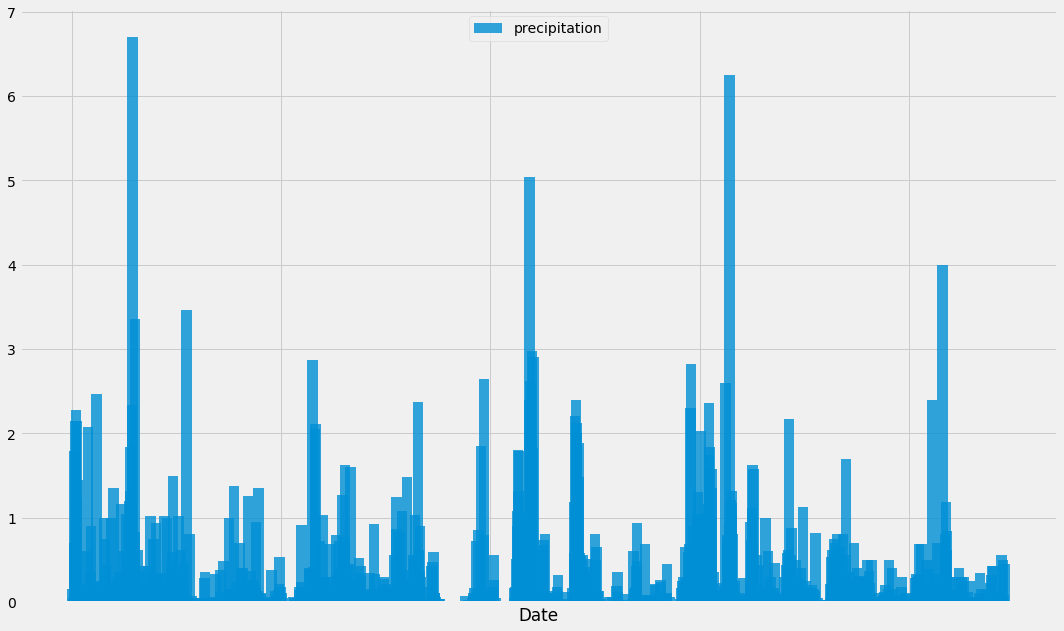

In [94]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(15,9))

xpos = range(0, len(result_df.index))
ypos = result_df['prcp']

ax.bar(xpos, ypos, width=25, alpha=0.8, label='precipitation')

ax.set_xlabel("Date")

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.legend(loc='upper center')

fig.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [95]:
# Use Pandas to calcualte the summary statistics for the precipitation data
result_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [96]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(func.count(Station.id)).all()
station_count 

[(9)]

In [97]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.id)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.id).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [100]:
# Retrieve most active station id
most_active_stat = active_station[0][0]

In [101]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
lowest_temp = session.query(func.min(Measurement.tobs)).\
                    filter(Measurement.station == most_active_stat).first()

highest_temp = session.query(func.max(Measurement.tobs)).\
                    filter(Measurement.station == most_active_stat).first()

avg_temp = session.query(func.avg(Measurement.tobs)).\
                    filter(Measurement.station == most_active_stat).first()

result_temp = [lowest_temp, highest_temp, avg_temp]
result_temp

[(54.0), (85.0), (71.66378066378067)]

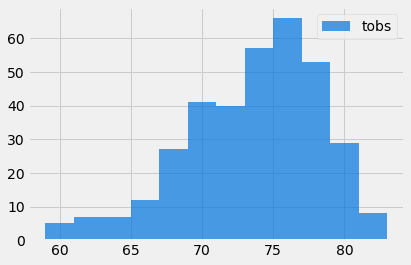

In [113]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
result_tobs = session.query(Measurement.tobs).\
    filter(Measurement.date >= first_date).\
    filter(Measurement.date <= last_date).\
    filter(Measurement.station == most_active_stat).all()

bins = 12

xpos = list()

for result_tob in result_tobs:
    xpos.append(result_tob[0])

plt.hist(xpos, bins=bins, facecolor='#0174DF', alpha=0.7,label='tobs')

# Set plot attributes
plt.legend(loc='upper right')

fig.tight_layout()
plt.show()

In [1]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [128]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [152]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start = '2017-01-01'
trip_end = '2017-01-07'

temp_set = calc_temps(trip_start, trip_end)
tmin = temp_set[0][0]
tave = temp_set[0][1]
tmax = temp_set[0][2]

print(temp_set)

[(62.0, 68.36585365853658, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


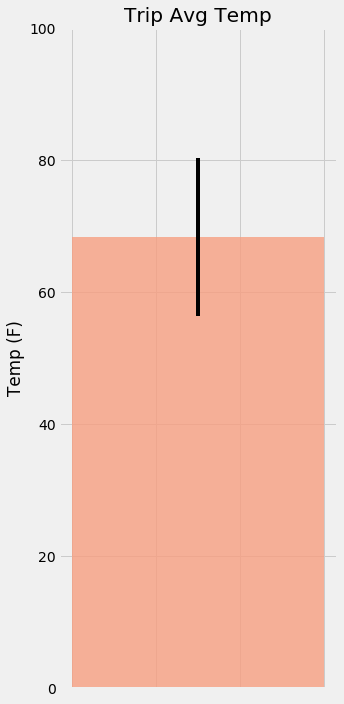

In [153]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

xpos = np.arange(1)
ypos = tave

fig, ax1 = plt.subplots(figsize=(5,10))
ax1.bar(xpos, ypos, yerr=tmax-tmin, width=-0.3, align='edge', alpha=0.8, color='#F79F81')
ax1.set_ylabel('Temp (F)')
y_ticks = np.arange(0, 120, 20)
ax1.set_yticks(y_ticks)


plt.title('Trip Avg Temp')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


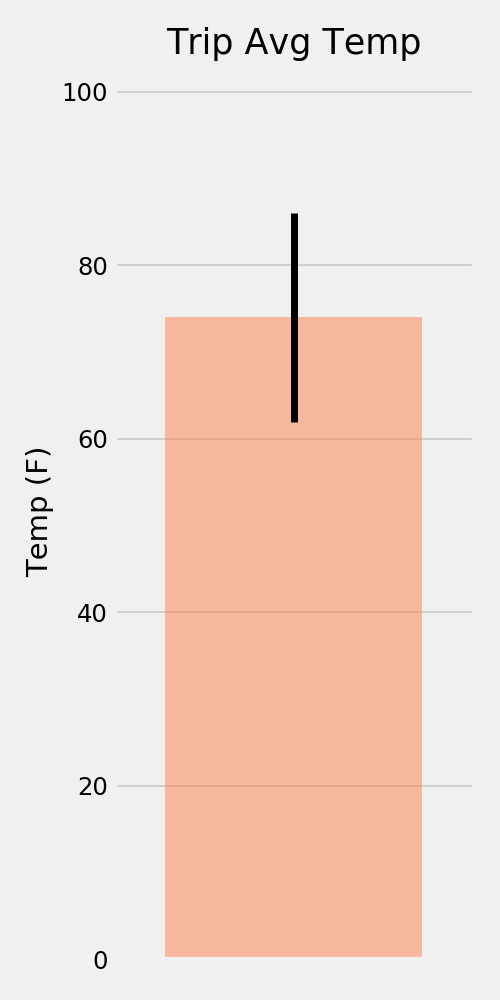

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


In [132]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Measurement.station, Station.name, func.avg(Measurement.prcp), Station.latitude, Station.longitude, Station.elevation]
joined = session.query(*sel).filter(Measurement.station == Station.station).\
                             filter(Measurement.date >= trip_start).\
                             filter(Measurement.date <= trip_end).\
                             group_by(Measurement.station).\
                             order_by(func.avg(Measurement.prcp).desc()).\
                             all()
joined

[('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  0.1525,
  21.33556,
  -157.71139,
  19.5),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  0.08571428571428572,
  21.5213,
  -157.8374,
  7.0),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  0.08571428571428572,
  21.3331,
  -157.8025,
  152.4),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  0.049999999999999996,
  21.4234,
  -157.8015,
  14.6),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  0.028571428571428574,
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 0.0, 21.2716, -157.8168, 3.0)]

## Optional Challenge Assignment

In [133]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [143]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
d1 = dt.date(2017, 1, 1)  
d2 = dt.date(2017, 1, 7)  

# Use the start and end date to create a range of dates
delta = d2 - d1         

full_dates = []
for i in range(delta.days + 1):
    full_dates.append(d1 + dt.timedelta(i))

# Stip off the year and save a list of %m-%d strings
dates = []
for full_date in full_dates:
    dates.append(full_date.strftime('%m-%d'))

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in dates:
    normals.append(daily_normals(date)[0])
    #print(daily_normals(date)[0])

print(normals)

[(62.0, 69.15384615384616, 77.0), (60.0, 69.39622641509433, 77.0), (62.0, 68.9090909090909, 77.0), (58.0, 70.0, 76.0), (56.0, 67.96428571428571, 76.0), (61.0, 68.96491228070175, 76.0), (57.0, 68.54385964912281, 76.0)]


In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [137]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, columns=['tmin', 'tavg', 'tmax'])
normals_df['date'] = full_dates
normals_df.set_index('date', inplace=True)
normals_df

,tmin,tavg,tmax
date,,,
2017-01-01,62.0,69.153846,77.0
2017-01-02,60.0,69.396226,77.0
2017-01-03,62.0,68.909091,77.0
2017-01-04,58.0,70.000000,76.0
2017-01-05,56.0,67.964286,76.0
2017-01-06,61.0,68.964912,76.0
2017-01-07,57.0,68.543860,76.0


In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


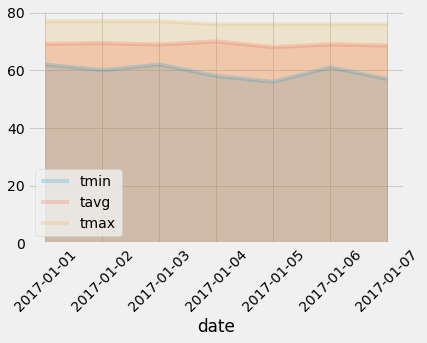

In [147]:
normals_df.plot(kind='area', stacked=False, alpha=0.2)
[ax.legend(('tmin', 'tavg', 'tmax'),
           loc='lower left') for ax in plt.gcf().axes]

plt.xticks(rotation=45)

plt.show()

<IPython.core.display.Javascript object>


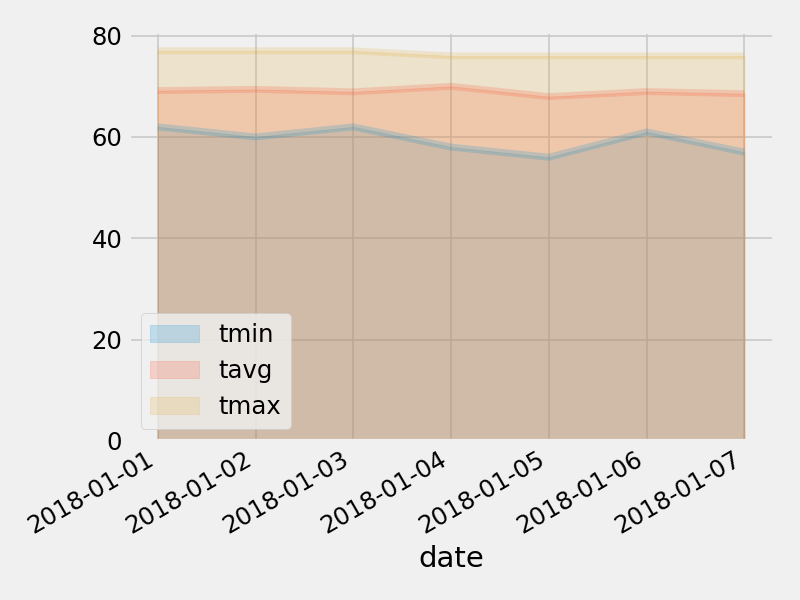

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
